In [7]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import numpy as np
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import scipy
import seaborn as sns
import glob

In [8]:
df = pd.read_csv("9112_combined_A_scores.csv")
df['chr'] = df['name'].apply(lambda x:x.split(":")[0])
df['start'] = df['name'].apply(lambda x:x.split(":")[1].split("-")[0])
df['end'] = df['name'].apply(lambda x:x.split(":")[1].split("-")[1])

print (df.head())

                    name                                       gRNAs  \
0  chr11:4167376-4167377  CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC   
1  chr11:4167377-4167378  CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC   
2  chr11:4167380-4167381  CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC   
3  chr11:4167381-4167382  CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC   
4  chr11:4167383-4167384  CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC   

                  FDRs   pos                              filtered_gRNAs  \
0  0.0001496, 0.011439  1, 2  CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC   
1  0.0001496, 0.011439  2, 3  CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC   
2  0.0001496, 0.011439  5, 6  CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC   
3  0.0001496, 0.011439  6, 7  CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC   
4  0.0001496, 0.011439  8, 9  CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC   

         filtered_FDRs filtered_pos  length  \
0  0.0001496, 0.011439         1, 2       2   
1  0.0001496, 0.

In [10]:
rename_cols = []
for c in df.columns:
    if "HbFBase" in c:
        rename_cols.append("HbFBase")
    else:
        rename_cols.append(c)
df.columns = rename_cols

In [11]:
names = ['HbFBase','CADD',"DeepSEA"]
for n in names:
    
    df['%s_rank'%(n)] = -df[n].rank(ascending=False)
df.head()

,name,gRNAs,FDRs,pos,filtered_gRNAs,filtered_FDRs,filtered_pos,length,new_FDR,EBM_FDR,CADD,DeepSEA,logDeepSEA,HbFBase,chr,start,end,HbFBase_rank,CADD_rank,DeepSEA_rank
0,chr11:4167376-4167377,"CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC","0.0001496, 0.011439","1, 2","CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC","0.0001496, 0.011439","1, 2",2,"0.0057890256172122906, 0.05075315571133837",0.004617,12.72,0.035078,1.454965,2.335626,chr11,4167376,4167377,-4619.0,-2329.5,-4726.0
1,chr11:4167377-4167378,"CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC","0.0001496, 0.011439","2, 3","CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC","0.0001496, 0.011439","2, 3",2,"0.0006637531335270759, 0.01736156959881251",0.000361,14.39,0.021679,1.663961,3.442387,chr11,4167377,4167378,-3352.0,-1922.5,-5753.0
2,chr11:4167380-4167381,"CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC","0.0001496, 0.011439","5, 6","CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC","0.0001496, 0.011439","5, 6",2,"0.00018472146078126313, 0.01994125184132767",0.000145,11.98,0.033376,1.476566,3.837755,chr11,4167380,4167381,-3008.0,-2531.5,-4851.0
3,chr11:4167381-4167382,"CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC","0.0001496, 0.011439","6, 7","CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC","0.0001496, 0.011439","6, 7",2,"0.0002607930129786362, 0.04178584344281158",0.000345,11.29,0.062163,1.206468,3.461704,chr11,4167381,4167382,-3335.0,-2708.5,-3210.0
4,chr11:4167383-4167384,"CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC","0.0001496, 0.011439","8, 9","CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC","0.0001496, 0.011439","8, 9",2,"0.0010517731094800192, 0.1297924727400633",0.002541,10.77,0.045018,1.346614,2.594969,chr11,4167383,4167384,-4300.0,-2853.5,-4078.0


In [12]:
df['start'] = df['start'].astype(int)
df = df.sort_values(['chr','start'])
df.head()

,name,gRNAs,FDRs,pos,filtered_gRNAs,filtered_FDRs,filtered_pos,length,new_FDR,EBM_FDR,CADD,DeepSEA,logDeepSEA,HbFBase,chr,start,end,HbFBase_rank,CADD_rank,DeepSEA_rank
0,chr11:4167376-4167377,"CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC","0.0001496, 0.011439","1, 2","CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC","0.0001496, 0.011439","1, 2",2,"0.0057890256172122906, 0.05075315571133837",0.004617,12.72,0.035078,1.454965,2.335626,chr11,4167376,4167377,-4619.0,-2329.5,-4726.0
1,chr11:4167377-4167378,"CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC","0.0001496, 0.011439","2, 3","CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC","0.0001496, 0.011439","2, 3",2,"0.0006637531335270759, 0.01736156959881251",0.000361,14.39,0.021679,1.663961,3.442387,chr11,4167377,4167378,-3352.0,-1922.5,-5753.0
2,chr11:4167380-4167381,"CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC","0.0001496, 0.011439","5, 6","CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC","0.0001496, 0.011439","5, 6",2,"0.00018472146078126313, 0.01994125184132767",0.000145,11.98,0.033376,1.476566,3.837755,chr11,4167380,4167381,-3008.0,-2531.5,-4851.0
3,chr11:4167381-4167382,"CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC","0.0001496, 0.011439","6, 7","CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC","0.0001496, 0.011439","6, 7",2,"0.0002607930129786362, 0.04178584344281158",0.000345,11.29,0.062163,1.206468,3.461704,chr11,4167381,4167382,-3335.0,-2708.5,-3210.0
4,chr11:4167383-4167384,"CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC","0.0001496, 0.011439","8, 9","CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC","0.0001496, 0.011439","8, 9",2,"0.0010517731094800192, 0.1297924727400633",0.002541,10.77,0.045018,1.346614,2.594969,chr11,4167383,4167384,-4300.0,-2853.5,-4078.0


HbFBase
-4556.5


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


CADD
-4556.5


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


DeepSEA
-4556.5


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


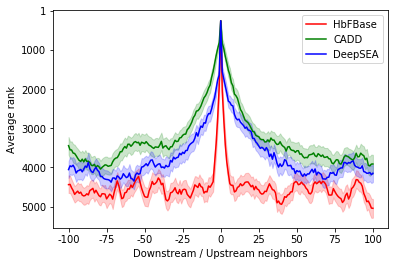

In [17]:
def to_matrix(df,n,top=500):
    c=n
    size=100
    tmp = df.copy()
    tmp = tmp.sort_values(n,ascending=False).head(n=top)
    my_index_list = tmp.index.tolist()
    out = []
    for i in my_index_list:
        line = []
        current_chr = df.at[i,"chr"]
        for j in range(-size,size+1):
            try:
                chr = df.at[i+j,"chr"]
            except:
#                 print (i+j)
                chr = "None"
            if chr == current_chr:
                value = df.at[i+j,"%s_rank"%(c)]
            else:
                value = np.nan
            line.append(value)
        out.append(line)
    out_df = pd.DataFrame(out)
    sel_cols = out_df.columns.tolist()
#     print (out_df.head())
    out_df.index = my_index_list
    out_df['chr'] = tmp['chr']
    out_df['start'] = tmp['start']
    out_df['end'] = tmp['end']
    out_df['name'] = tmp['name']
    out_df['value'] = "."
    out_df['strand'] = "."
    print (df["%s_rank"%(c)].mean())
    out_df = out_df.fillna(df["%s_rank"%(c)].mean())
    out_df[['chr','start','end','name','value','strand']+sel_cols].to_csv("%s.computeMatrix.bed"%(c),header=False,index=False,sep="\t")
    return out_df[sel_cols]    
color_dict ={}
color_dict['HbFBase']='red'
color_dict['CADD']='green'

color_dict['DeepSEA']='blue'
fig, ax = plt.subplots()
for n in names:
    print (n)
    result_df = to_matrix(df,n)
    mean_line = pd.DataFrame(result_df.mean())
#     sns.lineplot(data = mean_line)
    test = pd.melt(result_df)
    sns.lineplot(x="variable", y="value", data=test,c=color_dict[n],ax=ax,label=n)
    ax.set_xticklabels(['']+list(range(-100,101,25)))
    ax.set_yticklabels(['']+list(range(5000,999,-1000))+[1])
    plt.ylabel("Average rank")
    plt.xlabel("Downstream / Upstream neighbors")   
plt.savefig("Score_ranks_comparison_top500.pdf", bbox_inches='tight')